### Import Library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import SMOTE

### Load Data

In [43]:
train_data = pd.read_csv("train.csv")
train_data.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,Spain,Male,38.0,2,62276.99,1,Yes,Yes,59280.79,No,4,DIAMOND,757,0
1,2,Chinweuba,529.0,France,Female,29.0,8,0.00,2,Yes,NaN,19842.11,No,3,SILVER,476,0
2,3,Clapp,589.0,France,Female,50.0,4,0.00,2,No,Yes,182076.97,No,4,PLATINUM,441,0
3,4,Boni,515.0,France,Male,40.0,0,109542.29,1,Yes,Yes,166370.81,No,5,GOLD,312,0
4,5,Jamieson,528.0,Spain,Male,43.0,7,97473.87,2,Yes,Yes,159823.16,No,3,PLATINUM,654,0


In [44]:
print(f'Train columns: {train_data.columns}')

Train columns: Index(['ID', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned', 'Exited'],
      dtype='object')


### EDA

In [45]:
# Summary statistics
print("\nSummary statistics of train dataset:")
print(train_data.describe())


Summary statistics of train dataset:
                ID  CreditScore          Age       Tenure        Balance  \
count  8030.000000  7603.000000  7588.000000  8030.000000    8030.000000   
mean   4015.500000   650.572932    38.834212     4.997509   76760.274842   
std    2318.205664    96.677445    10.553106     2.895015   62436.537619   
min       1.000000   350.000000    18.000000     0.000000       0.000000   
25%    2008.250000   583.000000    32.000000     3.000000       0.000000   
50%    4015.500000   651.000000    37.000000     5.000000   97562.950000   
75%    6022.750000   717.000000    44.000000     7.000000  127849.000000   
max    8030.000000   850.000000    92.000000    10.000000  250898.090000   

       NumOfProducts  EstimatedSalary  Satisfaction Score  Point Earned  \
count    8030.000000      7664.000000         8030.000000   8030.000000   
mean        1.530386     99789.518316            3.019054    604.522540   
std         0.580551     57475.475959            1.4

In [46]:
numerical_cols = [var for var in train_data.columns if train_data[var].dtype != 'object']
categorical_cols = [var for var in train_data.columns if train_data[var].dtype == 'object'] 

print("Numerical columns:")
print(numerical_cols)

print("Categorical columns:")
print(categorical_cols)

Numerical columns:
['ID', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned', 'Exited']
Categorical columns:
['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']


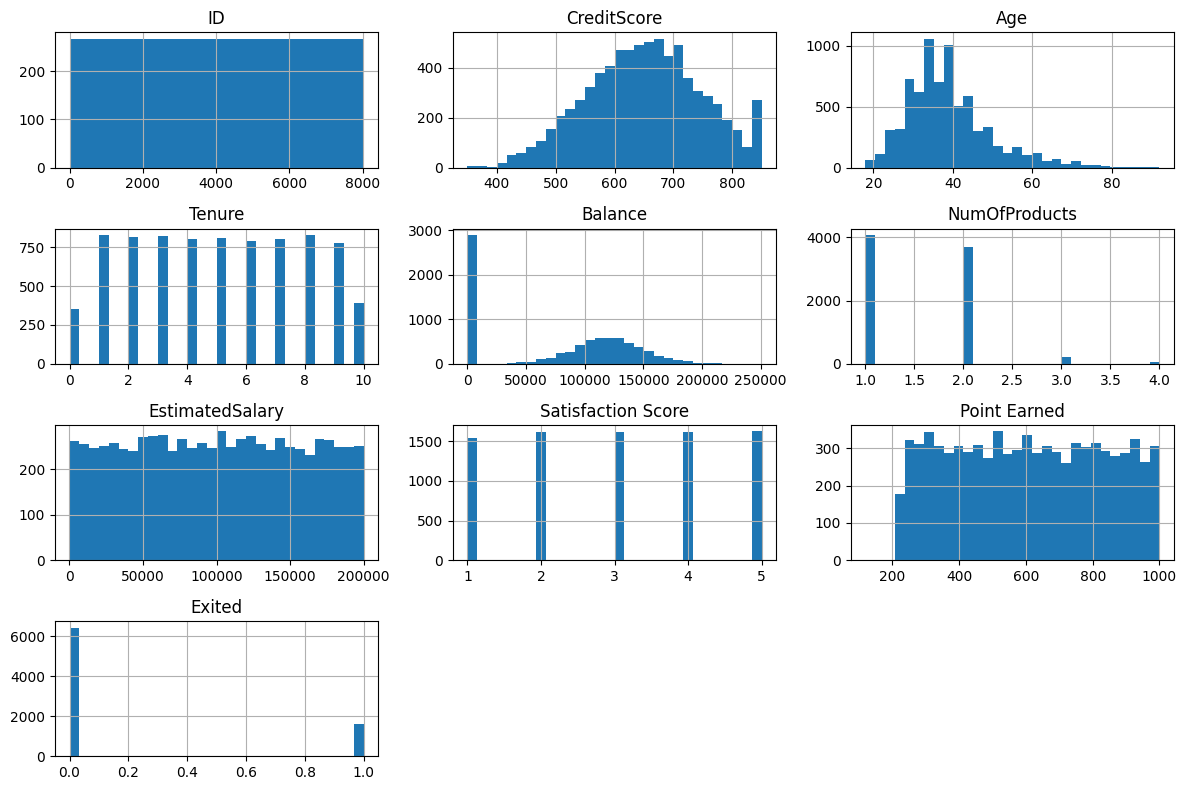

In [47]:
train_data[numerical_cols].hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [48]:
# Remove 'Surname' in categorical column because is not related
k = 'Surname'

while(k in categorical_cols):
    categorical_cols.remove(k)

categorical_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Complain', 'Card Type']

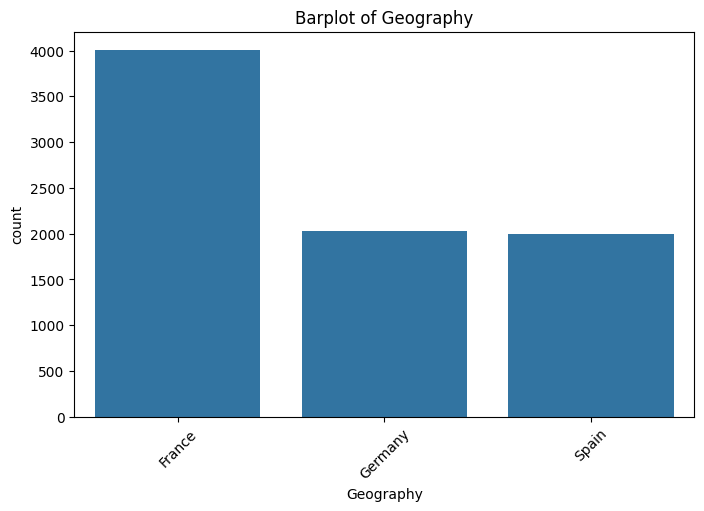

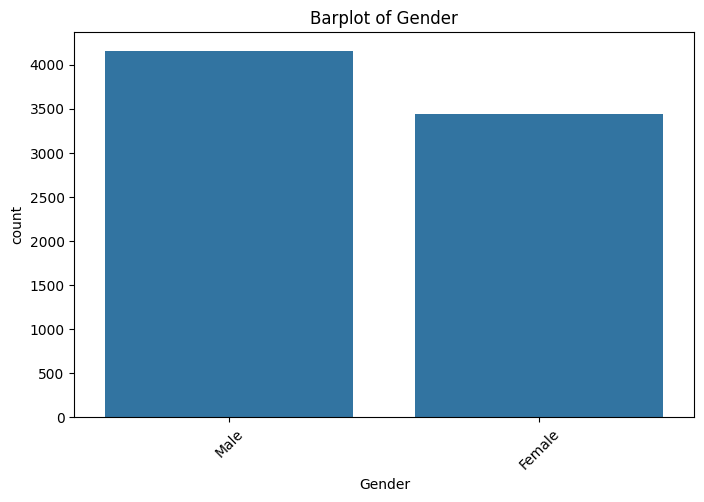

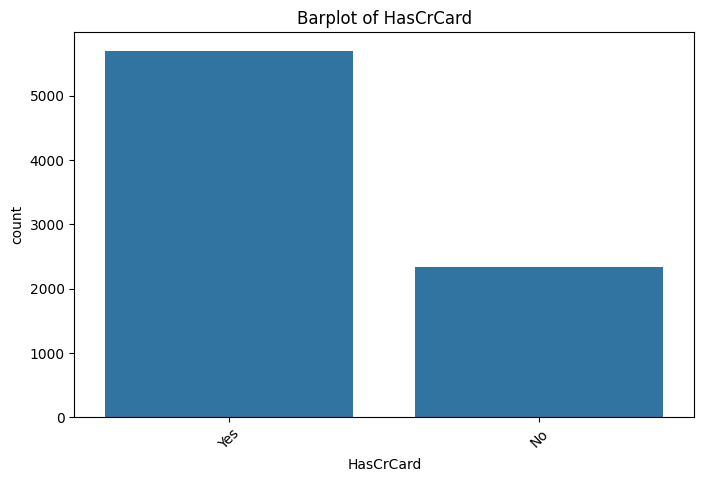

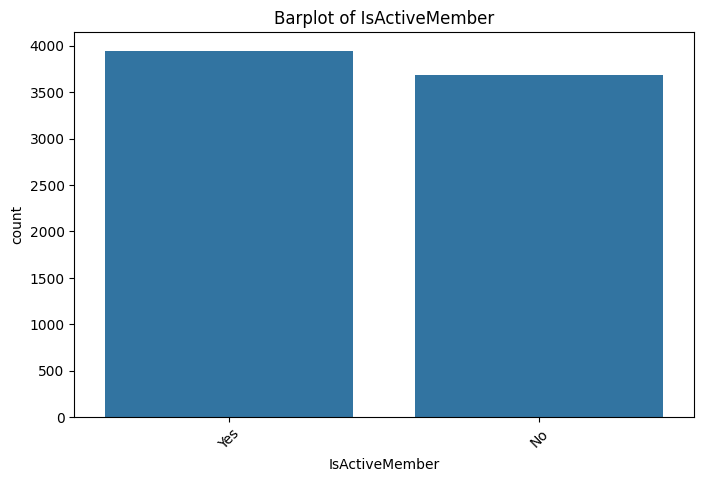

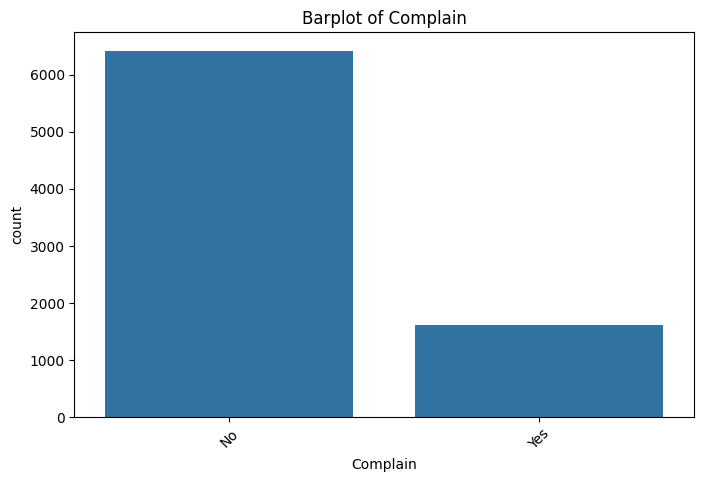

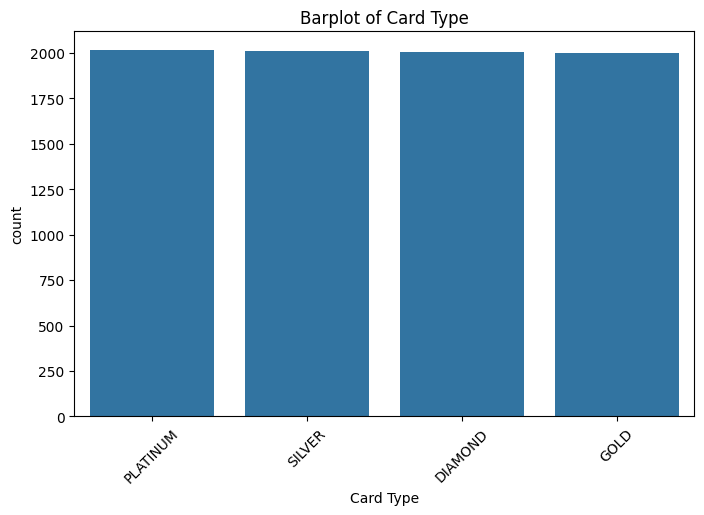

In [49]:
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_data, x=col, order=train_data[col].value_counts().index)
    plt.title(f'Barplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
train_data2 = train_data.copy()

for col in categorical_cols:
    le = LabelEncoder()
    
    train_data2[col] = le.fit_transform(train_data2[col])

train_data2.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2,62276.99,1,1,1,59280.79,0,4,0,757,0
1,2,Chinweuba,529.0,0,0,29.0,8,0.00,2,1,2,19842.11,0,3,3,476,0
2,3,Clapp,589.0,0,0,50.0,4,0.00,2,0,1,182076.97,0,4,2,441,0
3,4,Boni,515.0,0,1,40.0,0,109542.29,1,1,1,166370.81,0,5,1,312,0
4,5,Jamieson,528.0,2,1,43.0,7,97473.87,2,1,1,159823.16,0,3,2,654,0


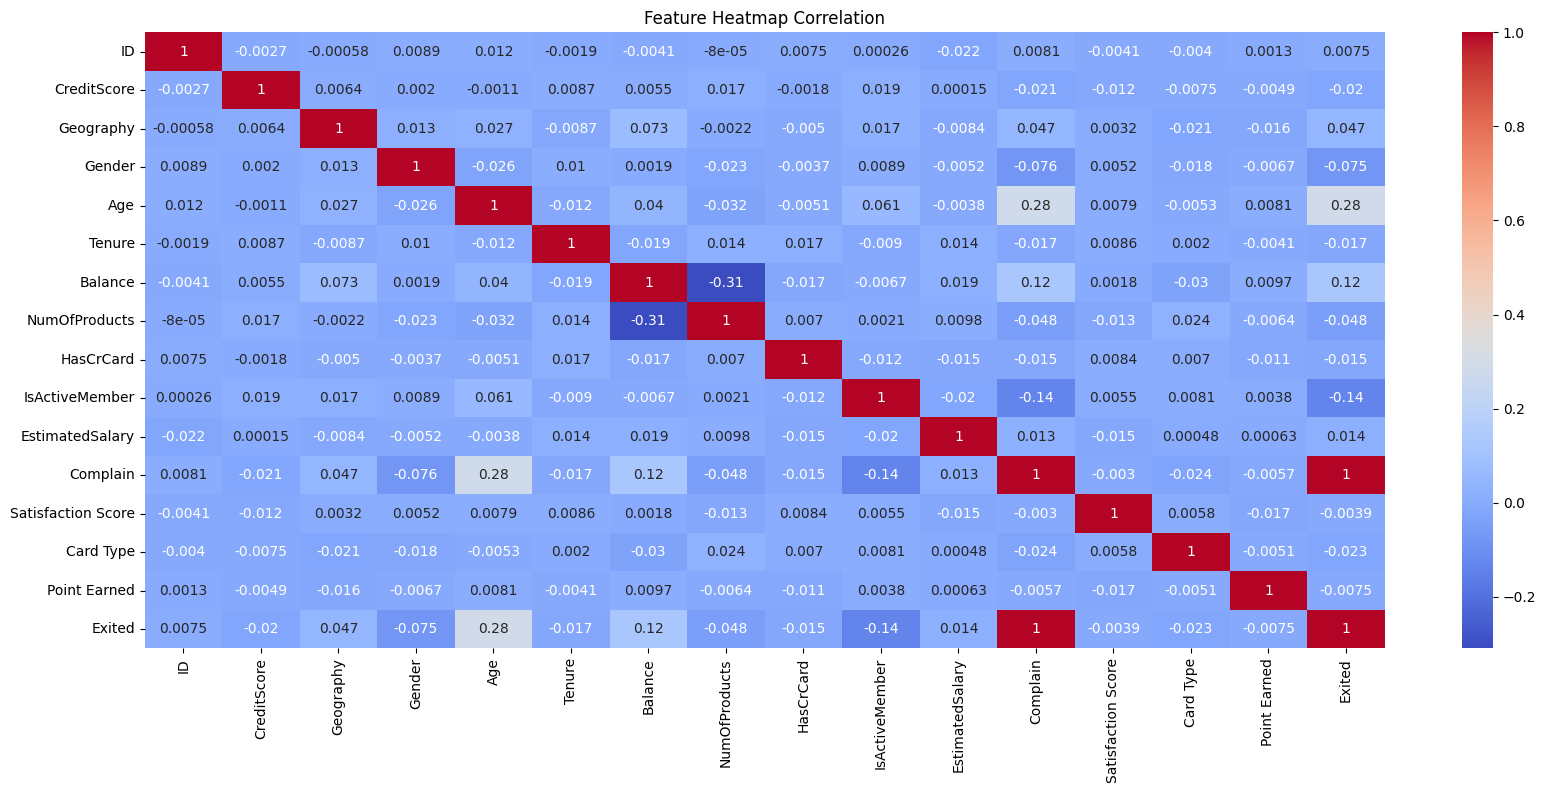

In [51]:
num_corr = train_data2.drop('Surname', axis=1).corr()

plt.figure(figsize=(20,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm')
plt.title('Feature Heatmap Correlation')
plt.show()


Distribusi target (Exited):

Exited
0    6428
1    1602
Name: count, dtype: int64


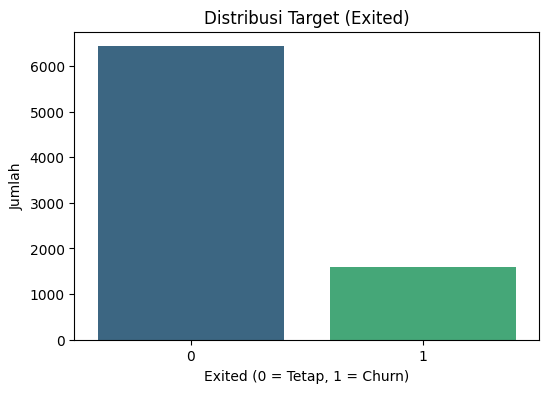

In [52]:
print("\nDistribusi target (Exited):\n")
print(train_data['Exited'].value_counts())

# Visualisasi distribusi target
plt.figure(figsize=(6,4))
sns.countplot(x=train_data["Exited"], hue=train_data["Exited"], palette="viridis", legend=False)
plt.xlabel("Exited (0 = Tetap, 1 = Churn)")
plt.ylabel("Jumlah")
plt.title("Distribusi Target (Exited)")
plt.show()

### Feature Engineering & Data Preprocessing

Missing Value Handling

In [53]:
print("Missing values in train dataset:")
print(train_data.isnull().sum())

Missing values in train dataset:
ID                      0
Surname                 0
CreditScore           427
Geography               0
Gender                423
Age                   442
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember        402
EstimatedSalary       366
Complain                0
Satisfaction Score      0
Card Type               0
Point Earned            0
Exited                  0
dtype: int64


In [54]:
# Mengisi missing values di kolom numerik dengan median
for col in numerical_cols:
    median_value = train_data[col].median()
    train_data[col].fillna(median_value, inplace=True)

# Mengisi missing values di kolom kategorikal dengan modus
for col in categorical_cols:
    mode_value = train_data[col].mode()[0]
    train_data[col].fillna(mode_value, inplace=True)

C:\Users\Nisa\AppData\Local\Temp\ipykernel_21316\561135274.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[col].fillna(median_value, inplace=True)
C:\Users\Nisa\AppData\Local\Temp\ipykernel_21316\561135274.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [55]:
print("\nMissing values in train dataset after handling:")
print(train_data.isnull().sum())


Missing values in train dataset after handling:
ID                    0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
Exited                0
dtype: int64


In [56]:
# Memeriksa duplikat 
duplicates_train = train_data.duplicated().sum()
print(f"Jumlah duplikat pada train dataset: {duplicates_train}")

Jumlah duplikat pada train dataset: 0


In [57]:
for col in categorical_cols:
    print(train_data[col].value_counts())
    print('-'*50)

Geography
France     4006
Germany    2027
Spain      1997
Name: count, dtype: int64
--------------------------------------------------
Gender
Male      4585
Female    3445
Name: count, dtype: int64
--------------------------------------------------
HasCrCard
Yes    5700
No     2330
Name: count, dtype: int64
--------------------------------------------------
IsActiveMember
Yes    4350
No     3680
Name: count, dtype: int64
--------------------------------------------------
Complain
No     6422
Yes    1608
Name: count, dtype: int64
--------------------------------------------------
Card Type
PLATINUM    2017
SILVER      2010
DIAMOND     2003
GOLD        2000
Name: count, dtype: int64
--------------------------------------------------


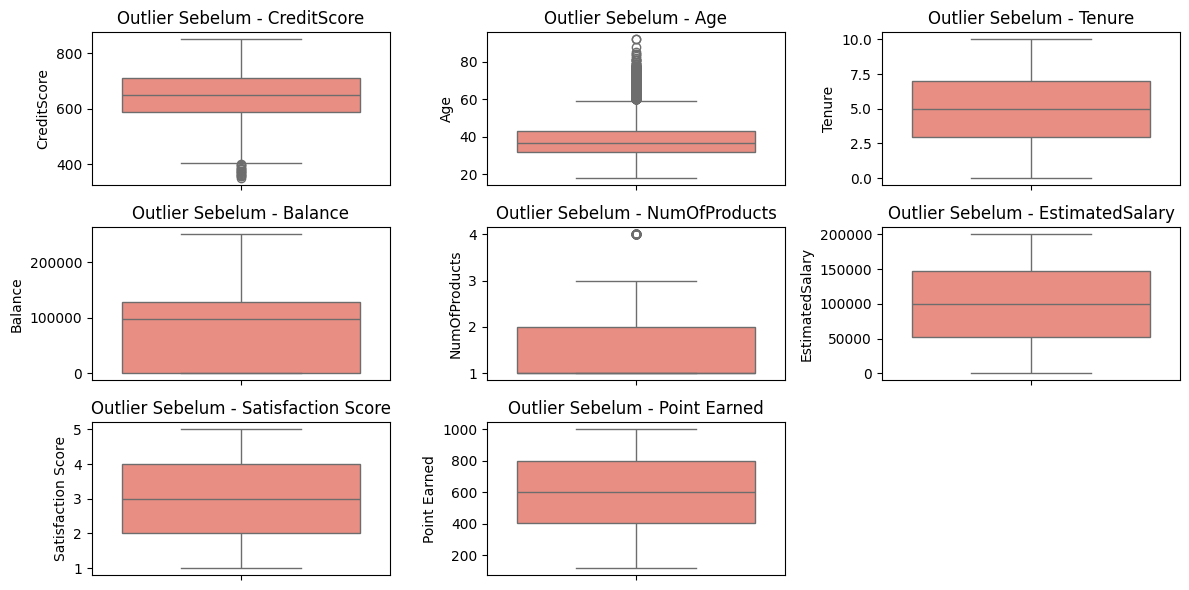

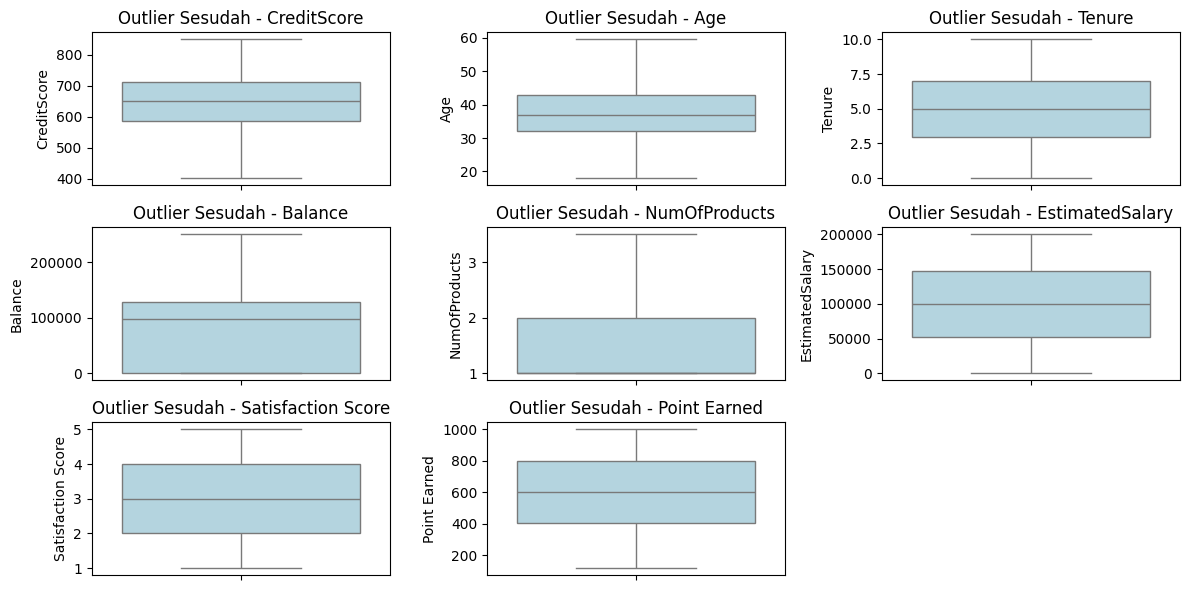

In [58]:
# Mendeteksi dan menangani outlier dengan Winsorizing
def remove_outliers_iqr(train_data, columns):
    for col in columns:
        Q1 = train_data[col].quantile(0.25)
        Q3 = train_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        train_data[col] = np.where(train_data[col] < lower_bound, lower_bound, train_data[col])
        train_data[col] = np.where(train_data[col] > upper_bound, upper_bound, train_data[col])
    return train_data

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned']

# Visualisasi outlier sebelum dihapus
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_data[feature], color="salmon")
    plt.title(f"Outlier Sebelum - {feature}")
plt.tight_layout()
plt.show()

# Menghapus outlier
train_data = remove_outliers_iqr(train_data, numerical_features)

# Visualisasi outlier setelah dihapus
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=train_data[feature], color="lightblue")
    plt.title(f"Outlier Sesudah - {feature}")
plt.tight_layout()
plt.show()

In [59]:
le = LabelEncoder()

for col in categorical_cols:
    le = LabelEncoder()
    
    train_data[col] = le.fit_transform(train_data[col])

In [60]:
train_data.head()

,ID,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
0,1,Martin,727.0,2,1,38.0,2.0,62276.99,1.0,1,1,59280.79,0,4.0,0,757.0,0
1,2,Chinweuba,529.0,0,0,29.0,8.0,0.00,2.0,1,1,19842.11,0,3.0,3,476.0,0
2,3,Clapp,589.0,0,0,50.0,4.0,0.00,2.0,0,1,182076.97,0,4.0,2,441.0,0
3,4,Boni,515.0,0,1,40.0,0.0,109542.29,1.0,1,1,166370.81,0,5.0,1,312.0,0
4,5,Jamieson,528.0,2,1,43.0,7.0,97473.87,2.0,1,1,159823.16,0,3.0,2,654.0,0


In [61]:
# Hapus fitur yang kurang relevan
train_data.drop(columns=["ID", "Surname"], inplace=True)

In [62]:
# Memisahkan fitur dan target
X = train_data.drop(columns=["Exited"])
y = train_data["Exited"]

In [63]:
# Check unique values in y_train
print(y.value_counts())

Exited
0    6428
1    1602
Name: count, dtype: int64


### Machine Learning Modelling

In [64]:
# Split data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
# Menangani ketidakseimbangan data dengan SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

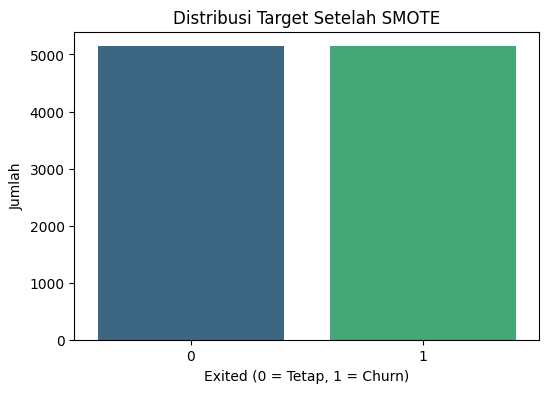

In [66]:
# Visualisasi distribusi target setelah SMOTE
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, palette="viridis", legend=False)
plt.xlabel("Exited (0 = Tetap, 1 = Churn)")
plt.ylabel("Jumlah")
plt.title("Distribusi Target Setelah SMOTE")
plt.show()

In [67]:
# Normalisasi fitur numerik
scaler = MinMaxScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [68]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [69]:
# Predictions
y_pred = model.predict(X_test)

In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("\nAkurasi Model: ", accuracy)


Akurasi Model:  0.99813200498132


In [71]:
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1286
           1       0.99      1.00      1.00       320

    accuracy                           1.00      1606
   macro avg       1.00      1.00      1.00      1606
weighted avg       1.00      1.00      1.00      1606



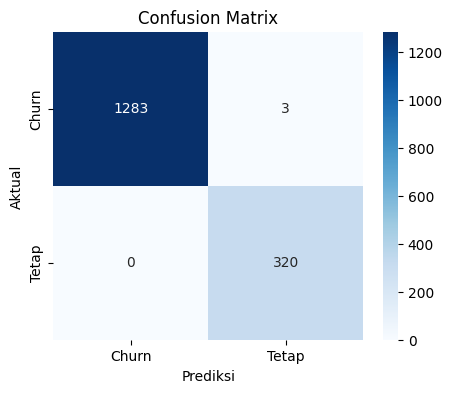

In [72]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Churn", "Tetap"], yticklabels=["Churn", "Tetap"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix")
plt.show()

In [73]:
# ROC-AUC Score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
print("\nROC-AUC Score: ", roc_auc)


ROC-AUC Score:  0.9995941874027994


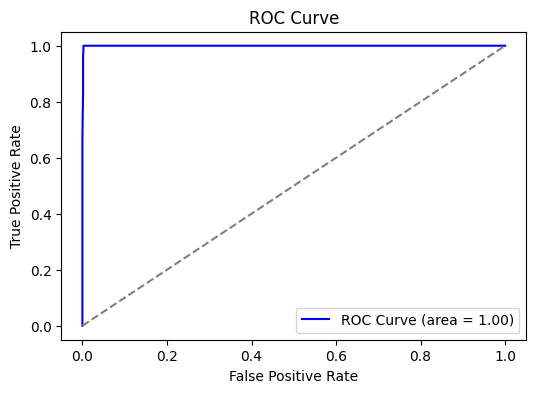

In [74]:
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='blue', label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()